In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import psycopg2
import pickle
from sklearn.preprocessing import StandardScaler

In [86]:
from config import db_password

In [87]:
database = "RealLeads"

In [88]:
# Make your local connection to the database in PostgreSQL
conn = psycopg2.connect(
    host="localhost",
    database=database,
    user="postgres",
    password=db_password)

In [89]:
# Table selection Function
def table_select(table_name):
    table =f"select * from \"{table_name}\""
    dataFrame = pd.read_sql(table, conn)
    return dataFrame

In [90]:
sales_data_df = table_select("sales_data_clean")

In [91]:
ml_Temp = pd.read_csv("../Resources/ml_Data_Cleaned_Supervised_Learning.csv")
ml_df = pd.read_csv("../Resources/ml_DataFrame_No_NAN.csv")


In [92]:
ml_Temp["MLSNumber"] = ml_df["MLSNumber"]

In [93]:
ml_Temp = ml_Temp[["MLSNumber","Orig_List_Price","Zip_Code","Subdivision","School_District","HOA_YN","Structure_Type","Acres","InteriorSqFt","AboveGradeSqFt","BelowGradeSqFt","Bedrooms","Baths","NumberofStories","Central_Air_YN","Water","Basement_YN","Garage_YN","ExteriorMaterial","YearBuilt"]]

In [94]:
delta_df = pd.read_csv("../Resources/randomforest_prediction.csv")

# Getting Data ready to predict sold price

In [95]:
ml_Temp

,MLSNumber,Orig_List_Price,Zip_Code,Subdivision,School_District,HOA_YN,Structure_Type,Acres,InteriorSqFt,AboveGradeSqFt,BelowGradeSqFt,Bedrooms,Baths,NumberofStories,Central_Air_YN,Water,Basement_YN,Garage_YN,ExteriorMaterial,YearBuilt
0,DENC518086,330000.0,13,461,4,2,1,0.26,2099.0,2099.0,0.0,4.0,2.0,27,2,12,2,2,205,87
1,DENC518982,215500.0,13,399,4,1,3,0.06,1927.0,1575.0,352.0,3.0,2.0,27,2,12,2,1,43,105
2,DENC512992,200000.0,13,618,4,1,3,0.05,1150.0,1150.0,0.0,2.0,2.0,27,2,12,2,1,291,114
3,DENC512104,219900.0,13,190,4,2,3,0.05,1425.0,1425.0,0.0,2.0,3.0,27,2,12,2,2,270,114
4,DENC506356,195000.0,13,546,4,1,1,0.14,0.0,0.0,0.0,4.0,3.0,12,1,12,2,2,237,83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4913,DENC520114,595000.0,1,86,4,2,1,1.03,3045.0,3045.0,0.0,3.0,2.0,11,2,12,2,2,283,87
4914,DENC520392,639000.0,1,471,4,2,1,0.75,3811.0,3175.0,636.0,4.0,4.0,12,2,15,2,2,211,102
4915,DENC2014038,529900.0,1,488,4,1,1,0.39,3191.0,2850.0,341.0,4.0,3.0,12,2,12,2,2,43,118
4916,DENC2005484,620000.0,1,419,4,1,1,0.54,3425.0,3425.0,0.0,4.0,3.0,12,2,12,2,2,141,121


In [96]:
delta_df

,MLSNumber,Zip_Code,Orig_List_Price,Pred_List_Price_RFR_Unscaled,Pred_List_Price_RFR_Scaled,Price_Diff_RFR_Unscaled,Price_Diff_RFR_Scaled
0,DENC518086,19808,330000.0,330013.990000,347853.000000,-13.990000,-17853.000000
1,DENC518982,19808,215500.0,224268.250000,230609.980000,-8768.250000,-15109.980000
2,DENC512992,19808,200000.0,207087.000000,220660.656667,-7087.000000,-20660.656667
3,DENC512104,19808,219900.0,230527.150000,234306.800000,-10627.150000,-14406.800000
4,DENC506356,19808,195000.0,218463.000000,258151.000000,-23463.000000,-63151.000000
...,...,...,...,...,...,...,...
4913,DENC520114,19707,595000.0,449425.990000,526757.000000,145574.010000,68243.000000
4914,DENC520392,19707,639000.0,507765.940000,584102.000000,131234.060000,54898.000000
4915,DENC2014038,19707,529900.0,514999.990000,521639.990000,14900.010000,8260.010000
4916,DENC2005484,19707,620000.0,580620.980000,582201.000000,39379.020000,37799.000000


In [97]:
rfr_df = pd.DataFrame.copy(ml_Temp,deep=True)

In [98]:
rfr_df["Pred_Orig_List_Price"] = delta_df["Pred_List_Price_RFR_Scaled"]

In [99]:
rfr_df

,MLSNumber,Orig_List_Price,Zip_Code,Subdivision,School_District,HOA_YN,Structure_Type,Acres,InteriorSqFt,AboveGradeSqFt,...,Bedrooms,Baths,NumberofStories,Central_Air_YN,Water,Basement_YN,Garage_YN,ExteriorMaterial,YearBuilt,Pred_Orig_List_Price
0,DENC518086,330000.0,13,461,4,2,1,0.26,2099.0,2099.0,...,4.0,2.0,27,2,12,2,2,205,87,347853.000000
1,DENC518982,215500.0,13,399,4,1,3,0.06,1927.0,1575.0,...,3.0,2.0,27,2,12,2,1,43,105,230609.980000
2,DENC512992,200000.0,13,618,4,1,3,0.05,1150.0,1150.0,...,2.0,2.0,27,2,12,2,1,291,114,220660.656667
3,DENC512104,219900.0,13,190,4,2,3,0.05,1425.0,1425.0,...,2.0,3.0,27,2,12,2,2,270,114,234306.800000
4,DENC506356,195000.0,13,546,4,1,1,0.14,0.0,0.0,...,4.0,3.0,12,1,12,2,2,237,83,258151.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4913,DENC520114,595000.0,1,86,4,2,1,1.03,3045.0,3045.0,...,3.0,2.0,11,2,12,2,2,283,87,526757.000000
4914,DENC520392,639000.0,1,471,4,2,1,0.75,3811.0,3175.0,...,4.0,4.0,12,2,15,2,2,211,102,584102.000000
4915,DENC2014038,529900.0,1,488,4,1,1,0.39,3191.0,2850.0,...,4.0,3.0,12,2,12,2,2,43,118,521639.990000
4916,DENC2005484,620000.0,1,419,4,1,1,0.54,3425.0,3425.0,...,4.0,3.0,12,2,12,2,2,141,121,582201.000000


In [100]:
rfr_df = pd.merge(rfr_df,sales_data_df[["MLSNumber","Sold_Price"]],on='MLSNumber')

In [101]:
rfr_df

,MLSNumber,Orig_List_Price,Zip_Code,Subdivision,School_District,HOA_YN,Structure_Type,Acres,InteriorSqFt,AboveGradeSqFt,...,Baths,NumberofStories,Central_Air_YN,Water,Basement_YN,Garage_YN,ExteriorMaterial,YearBuilt,Pred_Orig_List_Price,Sold_Price
0,DENC518086,330000.0,13,461,4,2,1,0.26,2099.0,2099.0,...,2.0,27,2,12,2,2,205,87,347853.000000,335000.0
1,DENC518982,215500.0,13,399,4,1,3,0.06,1927.0,1575.0,...,2.0,27,2,12,2,1,43,105,230609.980000,200000.0
2,DENC512992,200000.0,13,618,4,1,3,0.05,1150.0,1150.0,...,2.0,27,2,12,2,1,291,114,220660.656667,200000.0
3,DENC512104,219900.0,13,190,4,2,3,0.05,1425.0,1425.0,...,3.0,27,2,12,2,2,270,114,234306.800000,200000.0
4,DENC506356,195000.0,13,546,4,1,1,0.14,0.0,0.0,...,3.0,12,1,12,2,2,237,83,258151.000000,201000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4913,DENC520114,595000.0,1,86,4,2,1,1.03,3045.0,3045.0,...,2.0,11,2,12,2,2,283,87,526757.000000,595000.0
4914,DENC520392,639000.0,1,471,4,2,1,0.75,3811.0,3175.0,...,4.0,12,2,15,2,2,211,102,584102.000000,595000.0
4915,DENC2014038,529900.0,1,488,4,1,1,0.39,3191.0,2850.0,...,3.0,12,2,12,2,2,43,118,521639.990000,600000.0
4916,DENC2005484,620000.0,1,419,4,1,1,0.54,3425.0,3425.0,...,3.0,12,2,12,2,2,141,121,582201.000000,600000.0


In [102]:
rfr_df = rfr_df[["MLSNumber","Orig_List_Price","Pred_Orig_List_Price","Sold_Price","Zip_Code","Subdivision","School_District","HOA_YN","Structure_Type","Acres","InteriorSqFt","AboveGradeSqFt","BelowGradeSqFt","Bedrooms","Baths","NumberofStories","Central_Air_YN","Water","Basement_YN","Garage_YN","ExteriorMaterial","YearBuilt"]]

In [103]:
rfr_df

,MLSNumber,Orig_List_Price,Pred_Orig_List_Price,Sold_Price,Zip_Code,Subdivision,School_District,HOA_YN,Structure_Type,Acres,...,BelowGradeSqFt,Bedrooms,Baths,NumberofStories,Central_Air_YN,Water,Basement_YN,Garage_YN,ExteriorMaterial,YearBuilt
0,DENC518086,330000.0,347853.000000,335000.0,13,461,4,2,1,0.26,...,0.0,4.0,2.0,27,2,12,2,2,205,87
1,DENC518982,215500.0,230609.980000,200000.0,13,399,4,1,3,0.06,...,352.0,3.0,2.0,27,2,12,2,1,43,105
2,DENC512992,200000.0,220660.656667,200000.0,13,618,4,1,3,0.05,...,0.0,2.0,2.0,27,2,12,2,1,291,114
3,DENC512104,219900.0,234306.800000,200000.0,13,190,4,2,3,0.05,...,0.0,2.0,3.0,27,2,12,2,2,270,114
4,DENC506356,195000.0,258151.000000,201000.0,13,546,4,1,1,0.14,...,0.0,4.0,3.0,12,1,12,2,2,237,83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4913,DENC520114,595000.0,526757.000000,595000.0,1,86,4,2,1,1.03,...,0.0,3.0,2.0,11,2,12,2,2,283,87
4914,DENC520392,639000.0,584102.000000,595000.0,1,471,4,2,1,0.75,...,636.0,4.0,4.0,12,2,15,2,2,211,102
4915,DENC2014038,529900.0,521639.990000,600000.0,1,488,4,1,1,0.39,...,341.0,4.0,3.0,12,2,12,2,2,43,118
4916,DENC2005484,620000.0,582201.000000,600000.0,1,419,4,1,1,0.54,...,0.0,4.0,3.0,12,2,12,2,2,141,121


In [104]:
housing_price_df = pd.DataFrame.copy(rfr_df[["MLSNumber","Orig_List_Price","Pred_Orig_List_Price","Sold_Price"]],deep=True)

In [105]:
housing_price_df["Zip_Code"] = ml_df["Zip_Code"]

In [106]:
housing_price_df = housing_price_df[["MLSNumber","Zip_Code","Orig_List_Price","Pred_Orig_List_Price","Sold_Price"]]

In [107]:
housing_price_df.sample(5)

,MLSNumber,Zip_Code,Orig_List_Price,Pred_Orig_List_Price,Sold_Price
49,DENC523606,19808,234000.0,234306.80,234000.0
383,DENC507790,19808,450000.0,461424.95,460000.0
2063,DENC2018726,19804,299000.0,306355.99,323000.0
4757,DENC507884,19707,489900.0,515947.90,511000.0
2097,DENC502786,19803,249000.0,260154.00,261000.0


In [108]:
rfr_df = rfr_df.drop(rfr_df.columns[[0,1]] , axis=1)

# Beginning Scaling and splitting for mlModel

In [109]:
X = rfr_df.drop(columns="Sold_Price")
y = rfr_df["Sold_Price"]

In [110]:
data_scaler =StandardScaler()

In [111]:
rfr_df_Scaled = data_scaler.fit_transform(rfr_df.drop(columns="Sold_Price"))

In [112]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
X_train.shape

(3934, 19)

In [113]:
#Scaling Training Data
scaler = StandardScaler()

X_scaler = scaler.fit(X_train)

#Scaliing the data

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# RANDOM FOREST REGRESSOR 

In [114]:
from sklearn.ensemble import RandomForestRegressor

In [115]:
rfr_model = RandomForestRegressor(n_jobs=-1 , random_state=40)

rfr_model = rfr_model.fit(X_train_scaled,y_train)

In [116]:
rfr_pred = rfr_model.predict(X_test_scaled)

In [117]:
rfr_pred

array([362618.47      , 327382.31      , 332067.        , 520991.06      ,
       276891.39      , 300580.        , 254343.        , 363503.        ,
       400350.        , 323991.72      , 510535.36      , 452204.        ,
       320334.33333333, 221808.33333333, 311584.        , 484806.49      ,
       319841.12      , 455965.51      , 367966.97      , 450299.        ,
       290111.98      , 352605.        , 300951.5       , 304272.48      ,
       376509.        , 364448.75      , 301418.21      , 214199.        ,
       271562.23      , 280337.99      , 407769.88      , 231238.        ,
       473660.65      , 350837.        , 503027.53      , 381433.75      ,
       310921.5       , 355602.        , 233280.5       , 310161.13      ,
       342801.08333333, 490911.5       , 262214.        , 325480.66666667,
       385020.        , 211565.54      , 526099.        , 263944.        ,
       228912.52      , 272935.01      , 350458.36      , 342292.        ,
       229222.84      , 5

In [118]:
rfr_model.score(X_test_scaled,y_test)

0.8669241066278198

In [119]:
from sklearn.metrics import mean_squared_log_error, mean_absolute_error ,r2_score
def show_score(model):
    train_pred = model.predict(X_train_scaled)
    val_pred = model.predict(X_test_scaled)
    scores={"Training MAE" : mean_absolute_error(y_train,train_pred),
            "Valid MAE" : mean_absolute_error(y_test, val_pred),
            "Training RMSLE": np.sqrt(mean_squared_log_error(y_train, train_pred)),
            "Valid RMSLE" :  np.sqrt(mean_squared_log_error(y_test,val_pred)),
            "Training R^2" : r2_score(y_train, train_pred),
            "Valid R^2" : r2_score(y_test,val_pred)
           }
    return scores

In [120]:
show_score(rfr_model)

{'Training MAE': 9534.149863037743,
 'Valid MAE': 26117.225753968258,
 'Training RMSLE': 0.04063785487983377,
 'Valid RMSLE': 0.10734626214282886,
 'Training R^2': 0.9811488407628608,
 'Valid R^2': 0.8669241066278198}

In [121]:
filename = 'RFR_Scaled_SoldPrice.sav'
pickle.dump(rfr_model, open(filename, 'wb'))

## To load model later:
```
 //load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, Y_test)
print(result)
```

## Attaching data back

In [122]:
test_pred = rfr_model.predict(rfr_df_Scaled)

In [123]:
housing_price_df["Pred_Sold_Price"] = test_pred

In [124]:
housing_price_df.sample(5)

,MLSNumber,Zip_Code,Orig_List_Price,Pred_Orig_List_Price,Sold_Price,Pred_Sold_Price
853,DENC525382,19808,575000.0,532345.00,590000.0,501447.51
2724,DENC2005482,19802,215000.0,232662.88,215000.0,230097.79
2709,DENC2000336,19802,185000.0,240949.00,205000.0,220475.53
3874,DENC520164,19711,235000.0,247250.00,237000.0,234523.03
4253,DENC2003602,19711,249900.0,293458.99,260000.0,301515.39


In [125]:
housing_price_df["Price_Diff_Orig_Price"] = housing_price_df["Orig_List_Price"] - housing_price_df["Pred_Orig_List_Price"]

In [126]:
housing_price_df["Price_Diff_Sold_Price"] = housing_price_df["Sold_Price"] - housing_price_df["Pred_Sold_Price"]

In [127]:
housing_price_df.sample(3)

,MLSNumber,Zip_Code,Orig_List_Price,Pred_Orig_List_Price,Sold_Price,Pred_Sold_Price,Price_Diff_Orig_Price,Price_Diff_Sold_Price
2983,DENC504516,19720,195000.0,240757.250000,210000.0,244404.00,-45757.250000,-34404.00
1757,DENC523042,19804,200000.0,229770.436667,220000.0,226554.76,-29770.436667,-6554.76
1054,DENC510702,19806,550000.0,461481.000000,550000.0,461640.50,88519.000000,88359.50


In [128]:
housing_price_df.to_csv("../Resources/ml_housing_price",index=False)

In [129]:
def feature_plot(columns, importance, n=10):
    df = (pd.DataFrame({"features" : columns,
                        "feature_importances" : importance}).sort_values("feature_importances",ascending=False).reset_index(drop=True))
    return df

In [130]:
pf = feature_plot(X_train.columns, rfr_model.feature_importances_)

# VISUALIZATION

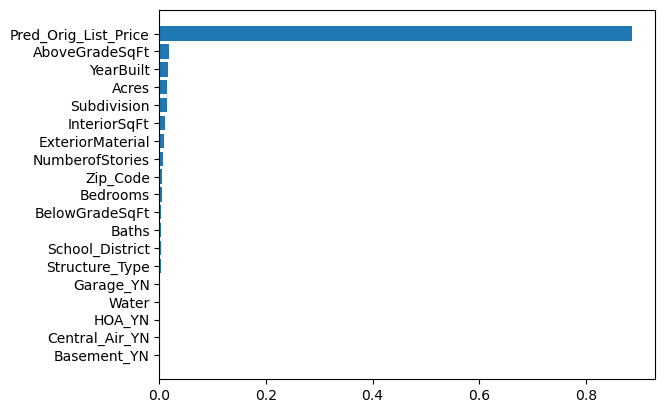

In [131]:
fig , ax = plt.subplots()
ax.barh(pf["features"] , pf["feature_importances"])
ax.invert_yaxis()

In [132]:
pf

,features,feature_importances
0,Pred_Orig_List_Price,0.886457
1,AboveGradeSqFt,0.017217
2,YearBuilt,0.016782
3,Acres,0.015001
4,Subdivision,0.013219
5,InteriorSqFt,0.010725
6,ExteriorMaterial,0.007714
7,NumberofStories,0.007257
8,Zip_Code,0.004344
9,Bedrooms,0.004005


In [133]:
zipcode_price_table = housing_price_df[["Orig_List_Price","Pred_Orig_List_Price","Sold_Price","Pred_Sold_Price"]].groupby(housing_price_df["Zip_Code"]).mean()

In [135]:
zipcode_price_table["Average_Diff_Orig_Price"] = zipcode_price_table["Orig_List_Price"] - zipcode_price_table["Pred_Orig_List_Price"]

In [136]:
zipcode_price_table["Average_Diff_Sold_Price"] = zipcode_price_table["Sold_Price"] - zipcode_price_table["Pred_Sold_Price"]

In [137]:
zipcode_price_table

,Orig_List_Price,Pred_Orig_List_Price,Sold_Price,Pred_Sold_Price,Average_Diff_Orig_Price,Average_Diff_Sold_Price
Zip_Code,,,,,,
19707,434042.989091,434512.721479,433419.174545,418989.667503,-469.732388,14429.507042
19711,359394.520101,365734.074506,364365.370603,354439.908418,-6339.554405,9925.462185
19720,275412.582503,286382.239500,280407.118494,278575.188656,-10969.656997,1831.929838
19732,580000.000000,457743.610000,541333.333333,443143.083333,122256.390000,98190.250000
19736,325000.000000,308262.200000,262500.000000,282311.250000,16737.800000,-19811.250000
19801,277116.125000,279961.370278,271316.947917,269434.029097,-2845.245278,1882.918819
19802,275578.648536,291996.678940,278018.184100,280240.134226,-16418.030404,-2221.950126
19803,396896.794286,395115.382825,396682.449524,387202.138088,1781.411460,9480.311435
19804,250353.475783,262391.690503,254941.646724,255339.464067,-12038.214720,-397.817344


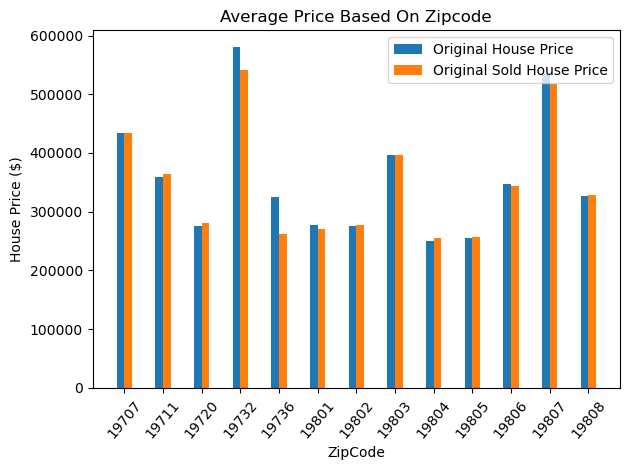

In [147]:
X = zipcode_price_table.index
X_axis = np.arange(len(X))
plt.bar(X_axis - 0.1,zipcode_price_table.Orig_List_Price,0.2,label="Original House Price")
plt.bar(X_axis + 0.1,zipcode_price_table.Sold_Price,0.2,label="Original Sold House Price")
plt.xticks(X_axis, X)
plt.tick_params(axis='x', rotation=50)
plt.xlabel("ZipCode")
plt.ylabel("House Price ($)")
plt.title("Average Price Based On Zipcode")
plt.legend()
plt.tight_layout()
plt.savefig("../Resources/price_diff_zipcode.png" ,dpi=400)
plt.show()

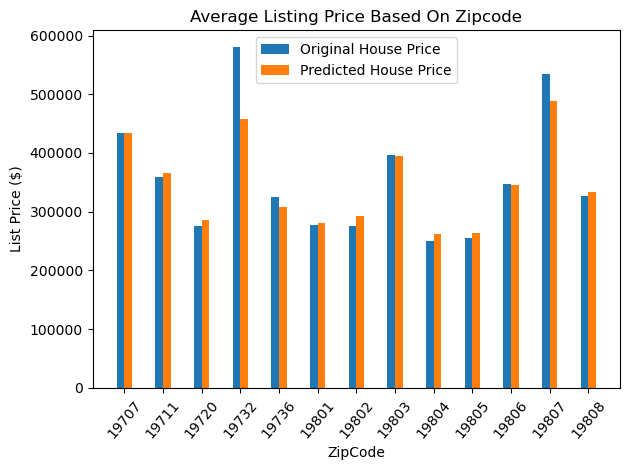

In [142]:
X = zipcode_price_table.index
X_axis = np.arange(len(X))
plt.bar(X_axis - 0.1,zipcode_price_table.Orig_List_Price,0.2,label="Original House Price")
plt.bar(X_axis + 0.1,zipcode_price_table.Pred_Orig_List_Price,0.2,label="Predicted House Price")
plt.xticks(X_axis, X)
plt.tick_params(axis='x', rotation=50)
plt.xlabel("ZipCode")
plt.ylabel("List Price ($)")
plt.title("Average Listing Price Based On Zipcode")
plt.legend()
plt.tight_layout()
plt.savefig("../Resources/orig_price_diff_pred_zipcode.png" ,dpi=400)
plt.show()

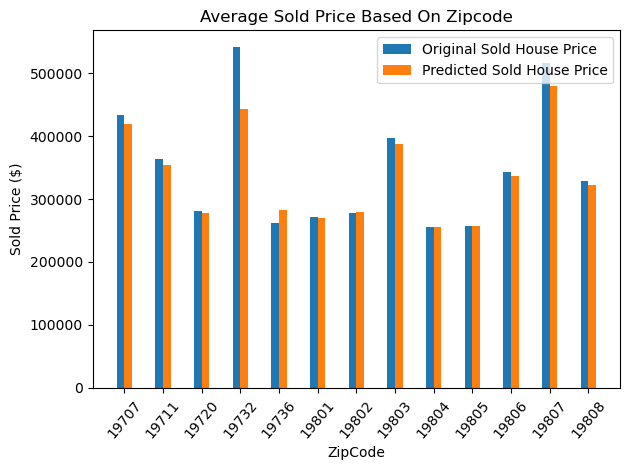

In [145]:
X = zipcode_price_table.index
X_axis = np.arange(len(X))
plt.bar(X_axis - 0.1,zipcode_price_table.Sold_Price,0.2,label="Original Sold House Price")
plt.bar(X_axis + 0.1,zipcode_price_table.Pred_Sold_Price,0.2,label="Predicted Sold House Price")
plt.xticks(X_axis, X)
plt.tick_params(axis='x', rotation=50)
plt.xlabel("ZipCode")
plt.ylabel("Sold Price ($)")
plt.title("Average Sold Price Based On Zipcode")
plt.legend()
plt.tight_layout()
plt.savefig("../Resources/sold_price_diff_pred_zipcode.png" ,dpi=400)
plt.show()

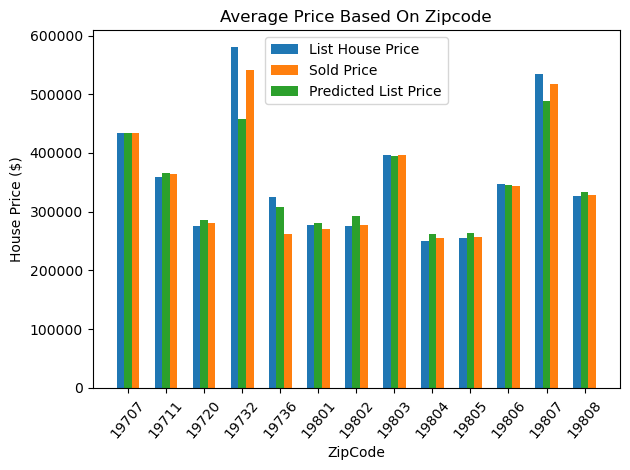

In [152]:
X = zipcode_price_table.index
X_axis = np.arange(len(X))
plt.bar(X_axis - 0.2,zipcode_price_table.Orig_List_Price,0.2,label="List House Price")
plt.bar(X_axis + 0.2,zipcode_price_table.Sold_Price,0.2,label="Sold Price")
plt.bar(X_axis,zipcode_price_table.Pred_Orig_List_Price,0.2, label="Predicted List Price")
plt.xticks(X_axis, X)
plt.tick_params(axis='x', rotation=50)
plt.xlabel("ZipCode")
plt.ylabel("House Price ($)")
plt.title("Average Price Based On Zipcode")
plt.legend()
plt.tight_layout()
plt.savefig("../Resources/olpred_diff_orig_zipcode.png" ,dpi=400)
plt.show()

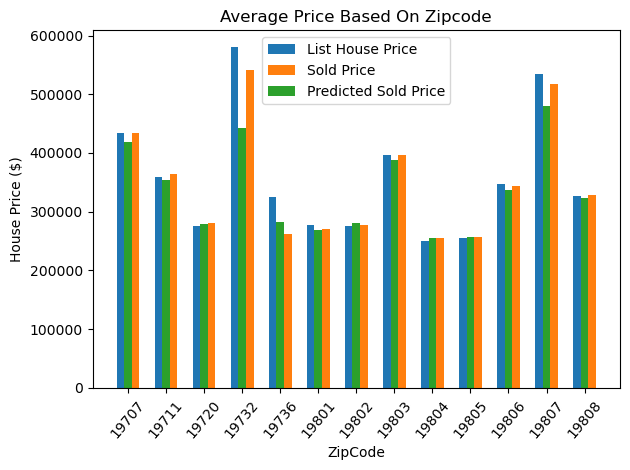

In [153]:
X = zipcode_price_table.index
X_axis = np.arange(len(X))
plt.bar(X_axis - 0.2,zipcode_price_table.Orig_List_Price,0.2,label="List House Price")
plt.bar(X_axis + 0.2,zipcode_price_table.Sold_Price,0.2,label="Sold Price")
plt.bar(X_axis,zipcode_price_table.Pred_Sold_Price,0.2, label="Predicted Sold Price")
plt.xticks(X_axis, X)
plt.tick_params(axis='x', rotation=50)
plt.xlabel("ZipCode")
plt.ylabel("House Price ($)")
plt.title("Average Price Based On Zipcode")
plt.legend()
plt.tight_layout()
plt.savefig("../Resources/soldpred_diff_orig_zipcode.png" ,dpi=400)
plt.show()

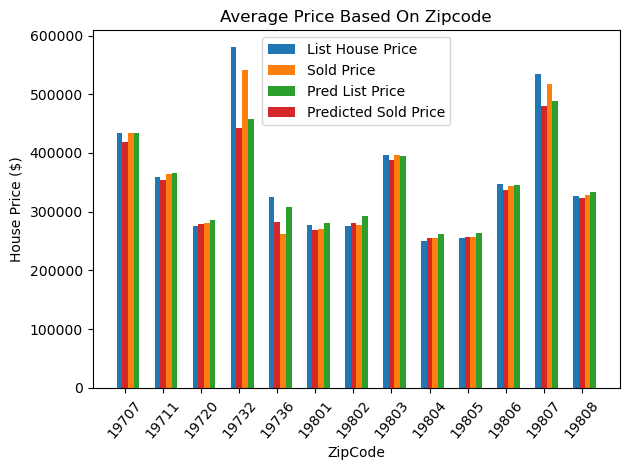

In [158]:
X = zipcode_price_table.index
X_axis = np.arange(len(X))
plt.bar(X_axis - 0.15,zipcode_price_table.Orig_List_Price,0.15,label="List House Price")
plt.bar(X_axis + 0.15,zipcode_price_table.Sold_Price,0.15,label="Sold Price")
plt.bar(X_axis +0.3,zipcode_price_table.Pred_Orig_List_Price,0.15,label="Pred List Price")
plt.bar(X_axis,zipcode_price_table.Pred_Sold_Price,0.15, label="Predicted Sold Price")

plt.xticks(X_axis, X)
plt.tick_params(axis='x', rotation=50)
plt.xlabel("ZipCode")
plt.ylabel("House Price ($)")
plt.title("Average Price Based On Zipcode")
plt.legend()
plt.tight_layout()
plt.savefig("../Resources/overall_diff_orig_zipcode.png" ,dpi=400)
plt.show()

In [160]:
#zipcode_price_table.to_csv("../Resources/zipcode_price_table.csv",index=False)